In [1]:
import pandas as pd 
import numpy as np
import plotly.express as px 
import matplotlib.pyplot as plt
from datasist.structdata import detect_outliers
import seaborn as sns
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_excel('Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### drop colunms

In [4]:
df.drop(["Route","Additional_Info"],axis=1,inplace =True)

### drop nan values

In [5]:
df.dropna(inplace=True)

### check duplicated

In [6]:
df.duplicated().sum()

220

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.reset_index(drop=True)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...,...,...
10457,Air Asia,9/04/2019,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107
10458,Air India,27/04/2019,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145
10459,Jet Airways,27/04/2019,Banglore,Delhi,08:20,11:20,3h,non-stop,7229
10460,Vistara,01/03/2019,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648


### explore data and cleaning

In [10]:
df["Price"].sort_values(ascending=False).head(10)

2924     79512
5372     62427
10364    57209
5439     54826
1478     54826
2618     54826
9715     52285
657      52229
7351     46490
396      36983
Name: Price, dtype: int64

In [11]:
df.Airline.value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [12]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10462 non-null  object        
 1   Date_of_Journey  10462 non-null  datetime64[ns]
 2   Source           10462 non-null  object        
 3   Destination      10462 non-null  object        
 4   Dep_Time         10462 non-null  object        
 5   Arrival_Time     10462 non-null  object        
 6   Duration         10462 non-null  object        
 7   Total_Stops      10462 non-null  object        
 8   Price            10462 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 817.3+ KB


In [14]:
df.Source.value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [15]:
df.Destination.value_counts()

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [16]:
df.Dep_Time.unique()

array(['22:20', '05:50', '09:25', '18:05', '16:50', '09:00', '18:55',
       '08:00', '08:55', '11:25', '09:45', '20:20', '11:40', '21:10',
       '17:15', '16:40', '08:45', '14:00', '20:15', '16:00', '14:10',
       '22:00', '04:00', '21:25', '21:50', '07:00', '07:05', '09:50',
       '14:35', '10:35', '15:05', '14:15', '06:45', '20:55', '11:10',
       '05:45', '19:00', '23:05', '11:00', '09:35', '21:15', '23:55',
       '19:45', '08:50', '15:40', '06:05', '15:00', '13:55', '05:55',
       '13:20', '05:05', '06:25', '17:30', '08:20', '19:55', '06:30',
       '14:05', '02:00', '09:40', '08:25', '20:25', '13:15', '02:15',
       '16:55', '20:45', '05:15', '19:50', '20:00', '06:10', '19:30',
       '04:45', '12:55', '18:15', '17:20', '15:25', '23:00', '12:00',
       '14:45', '11:50', '11:30', '14:40', '19:10', '06:00', '23:30',
       '07:35', '13:05', '12:30', '15:10', '12:50', '18:25', '16:30',
       '00:40', '06:50', '13:00', '19:15', '01:30', '17:00', '10:00',
       '19:35', '15:

### fix Arrival_Time column

In [17]:
df.Arrival_Time.head(10)

0    01:10 22 Mar
1           13:15
2    04:25 10 Jun
3           23:30
4           21:35
5           11:25
6    10:25 13 Mar
7    05:05 02 Mar
8    10:25 13 Mar
9           19:15
Name: Arrival_Time, dtype: object

In [18]:
df["Arrival_Time"]=df["Arrival_Time"].apply(lambda x:x [0:6].strip())

In [19]:
df["Arrival_Time_hours"]=df["Arrival_Time"].apply(lambda x:x.split(":")[0])

In [20]:
df["Arrival_Time_min"]=df["Arrival_Time"].apply(lambda x:x.split(":")[1])

In [21]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Arrival_Time_hours,Arrival_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10,2h 50m,non-stop,3897,01,10
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25,19h,2 stops,13882,04,25
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,21,35
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107,22,25
10679,Air India,2019-04-27,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145,23,20
10680,Jet Airways,2019-04-27,Banglore,Delhi,08:20,11:20,3h,non-stop,7229,11,20
10681,Vistara,2019-01-03,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648,14,10


### fix Duration colummn

In [22]:
df["Duration"]

0        2h 50m
1        7h 25m
2           19h
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680        3h
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10462, dtype: object

In [23]:
df['Duration_hour']=df['Duration'].str.split('h').str[0]

In [24]:
df['Duration_min']=df['Duration'].str.split('h').str[1]

In [25]:
df['Duration_min']=df['Duration_min'].str[:-1]

In [26]:
df['Duration_min'].replace("",0,inplace=True)

In [27]:
df["Duration_min"].fillna(0,inplace=True)

### handle departure

In [28]:
df["Dep_Time_hours"]=df["Dep_Time"].apply(lambda x:x.split(":")[0])

In [29]:
df["Dep_Time_min"]=df["Dep_Time"].apply(lambda x:x.split(":")[1])

In [30]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Arrival_Time_hours,Arrival_Time_min,Duration_hour,Duration_min,Dep_Time_hours,Dep_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10,2h 50m,non-stop,3897,01,10,2,50,22,20
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,7662,13,15,7,25,05,50
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25,19h,2 stops,13882,04,25,19,0,09,25
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,6218,23,30,5,25,18,05
4,IndiGo,2019-01-03,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,13302,21,35,4,45,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,4107,22,25,2,30,19,55
10679,Air India,2019-04-27,Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,4145,23,20,2,35,20,45
10680,Jet Airways,2019-04-27,Banglore,Delhi,08:20,11:20,3h,non-stop,7229,11,20,3,0,08,20
10681,Vistara,2019-01-03,Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,12648,14,10,2,40,11,30


In [31]:
df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [32]:
d={"non-stop":0
  ,"1 stop":1
  ,"2 stops":2
  ,"3 stops":3
  ,"4 stops":4}
df["Total_Stops"]=df["Total_Stops"].map(d)

In [33]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Arrival_Time_hours,Arrival_Time_min,Duration_hour,Duration_min,Dep_Time_hours,Dep_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10,2h 50m,0,3897,01,10,2,50,22,20
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662,13,15,7,25,05,50
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25,19h,2,13882,04,25,19,0,09,25
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5h 25m,1,6218,23,30,5,25,18,05
4,IndiGo,2019-01-03,Banglore,New Delhi,16:50,21:35,4h 45m,1,13302,21,35,4,45,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,19:55,22:25,2h 30m,0,4107,22,25,2,30,19,55
10679,Air India,2019-04-27,Kolkata,Banglore,20:45,23:20,2h 35m,0,4145,23,20,2,35,20,45
10680,Jet Airways,2019-04-27,Banglore,Delhi,08:20,11:20,3h,0,7229,11,20,3,0,08,20
10681,Vistara,2019-01-03,Banglore,New Delhi,11:30,14:10,2h 40m,0,12648,14,10,2,40,11,30


In [34]:
if df["Duration_hour"].str.contains('m').any():
    print ("Mel is there")

Mel is there


In [35]:
df["Duration_hour"].value_counts()

2     2387
1      621
3      500
7      487
5      481
9      445
12     426
8      424
13     381
11     365
10     355
6      340
14     337
15     262
23     240
16     234
4      222
26     214
24     195
25     183
22     181
27     174
21     172
20     161
18     130
17     128
19     125
28      93
29      50
30      49
38      31
37      17
33      10
32       9
34       7
35       7
31       6
36       5
47       2
42       2
39       1
5m       1
41       1
40       1
Name: Duration_hour, dtype: int64

In [36]:
df.drop(index=6474,axis=0,inplace=True)

### airlin column

In [37]:
df[df["Airline"]=="Trujet"]

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Arrival_Time_hours,Arrival_Time_min,Duration_hour,Duration_min,Dep_Time_hours,Dep_Time_min
2878,Trujet,2019-06-03,Mumbai,Hyderabad,13:05,16:20,3h 15m,1,4140,16,20,3,15,13,05


In [38]:
df[df["Airline"]=="Vistara Premium economy"]

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Arrival_Time_hours,Arrival_Time_min,Duration_hour,Duration_min,Dep_Time_hours,Dep_Time_min
426,Vistara Premium economy,2019-03-03,Banglore,New Delhi,16:00,18:35,2h 35m,0,11793,18,35,2,35,16,00
7657,Vistara Premium economy,2019-01-03,Chennai,Kolkata,07:05,09:20,2h 15m,0,9125,09,20,2,15,07,05
8615,Vistara Premium economy,2019-06-04,Banglore,Delhi,11:30,14:20,2h 50m,0,5969,14,20,2,50,11,30


In [39]:
df[df["Airline"]=="Jet Airways Business"]

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Arrival_Time_hours,Arrival_Time_min,Duration_hour,Duration_min,Dep_Time_hours,Dep_Time_min
657,Jet Airways Business,2019-01-03,Banglore,New Delhi,05:45,10:45,5h,1,52229,10,45,5,0,05,45
2924,Jet Airways Business,2019-01-03,Banglore,New Delhi,05:45,11:25,5h 40m,1,79512,11,25,5,40,05,45
5372,Jet Airways Business,2019-01-03,Banglore,New Delhi,05:45,12:25,6h 40m,1,62427,12,25,6,40,05,45
7351,Jet Airways Business,2019-03-03,Delhi,Cochin,20:05,04:25,8h 20m,2,46490,04,25,8,20,20,05
9715,Jet Airways Business,2019-06-03,Delhi,Cochin,20:05,04:25,8h 20m,2,52285,04,25,8,20,20,05
10364,Jet Airways Business,2019-01-03,Banglore,New Delhi,09:45,14:25,4h 40m,1,57209,14,25,4,40,09,45


In [40]:
df.drop(index=[657,2924,5372,7351,9715,10364],axis=0,inplace=True)

In [41]:
df.drop(index=[2878,426,7657,8615],axis=0,inplace=True)

In [42]:
df.reset_index(drop=True)

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Arrival_Time_hours,Arrival_Time_min,Duration_hour,Duration_min,Dep_Time_hours,Dep_Time_min
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10,2h 50m,0,3897,01,10,2,50,22,20
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662,13,15,7,25,05,50
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25,19h,2,13882,04,25,19,0,09,25
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5h 25m,1,6218,23,30,5,25,18,05
4,IndiGo,2019-01-03,Banglore,New Delhi,16:50,21:35,4h 45m,1,13302,21,35,4,45,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10446,Air Asia,2019-09-04,Kolkata,Banglore,19:55,22:25,2h 30m,0,4107,22,25,2,30,19,55
10447,Air India,2019-04-27,Kolkata,Banglore,20:45,23:20,2h 35m,0,4145,23,20,2,35,20,45
10448,Jet Airways,2019-04-27,Banglore,Delhi,08:20,11:20,3h,0,7229,11,20,3,0,08,20
10449,Vistara,2019-01-03,Banglore,New Delhi,11:30,14:10,2h 40m,0,12648,14,10,2,40,11,30


In [43]:
df["month"]=df["Date_of_Journey"].dt.month

In [44]:
df["day"]=df["Date_of_Journey"].dt.day

In [45]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Arrival_Time_hours,Arrival_Time_min,Duration_hour,Duration_min,Dep_Time_hours,Dep_Time_min,month,day
0,IndiGo,2019-03-24,Banglore,New Delhi,22:20,01:10,2h 50m,0,3897,01,10,2,50,22,20,3,24
1,Air India,2019-01-05,Kolkata,Banglore,05:50,13:15,7h 25m,2,7662,13,15,7,25,05,50,1,5
2,Jet Airways,2019-09-06,Delhi,Cochin,09:25,04:25,19h,2,13882,04,25,19,0,09,25,9,6
3,IndiGo,2019-12-05,Kolkata,Banglore,18:05,23:30,5h 25m,1,6218,23,30,5,25,18,05,12,5
4,IndiGo,2019-01-03,Banglore,New Delhi,16:50,21:35,4h 45m,1,13302,21,35,4,45,16,50,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,19:55,22:25,2h 30m,0,4107,22,25,2,30,19,55,9,4
10679,Air India,2019-04-27,Kolkata,Banglore,20:45,23:20,2h 35m,0,4145,23,20,2,35,20,45,4,27
10680,Jet Airways,2019-04-27,Banglore,Delhi,08:20,11:20,3h,0,7229,11,20,3,0,08,20,4,27
10681,Vistara,2019-01-03,Banglore,New Delhi,11:30,14:10,2h 40m,0,12648,14,10,2,40,11,30,1,3


## train test split

In [46]:
x=df.drop(["Date_of_Journey","Duration","Dep_Time","Arrival_Time","Price"],axis=1)
y=df["Price"]

In [47]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
x_train.shape,x_test.shape

((8360, 12), (2091, 12))

### work with categorical data

In [49]:
import category_encoders as ce

In [50]:
encoder=ce.OneHotEncoder(cols=["Airline","Source","Destination"],handle_unknown='return_nan',return_df=True,use_cat_names=True)
encoder

OneHotEncoder(cols=['Airline', 'Source', 'Destination'], drop_invariant=False,
              handle_missing='value', handle_unknown='return_nan',
              return_df=True, use_cat_names=True, verbose=0)

In [51]:
encoding_x_train = encoder.fit_transform(x_train)
encoding_x_test = encoder.fit_transform(x_test)

In [52]:
encoding_x_train

,Airline_Jet Airways,Airline_Multiple carriers,Airline_Vistara,Airline_SpiceJet,Airline_Air India,Airline_IndiGo,Airline_GoAir,Airline_Air Asia,Airline_Multiple carriers Premium economy,Source_Banglore,...,Destination_Kolkata,Total_Stops,Arrival_Time_hours,Arrival_Time_min,Duration_hour,Duration_min,Dep_Time_hours,Dep_Time_min,month,day
512,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1,16,10,7,15,08,55,3,21
4847,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,13,20,9,20,04,00,3,27
4053,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1,10,25,22,45,11,40,3,21
7452,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,23,25,6,25,17,00,5,24
3983,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,19,45,2,30,17,15,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5804,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0,08,35,2,40,05,55,1,6
5251,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1,21,00,9,30,11,30,3,27
5457,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,23,25,9,30,13,55,3,24
863,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,22,05,12,30,09,35,12,6


In [53]:
x_train

,Airline,Source,Destination,Total_Stops,Arrival_Time_hours,Arrival_Time_min,Duration_hour,Duration_min,Dep_Time_hours,Dep_Time_min,month,day
512,Jet Airways,Banglore,New Delhi,1,16,10,7,15,08,55,3,21
4847,Multiple carriers,Delhi,Cochin,1,13,20,9,20,04,00,3,27
4053,Jet Airways,Banglore,New Delhi,1,10,25,22,45,11,40,3,21
7452,Vistara,Kolkata,Banglore,1,23,25,6,25,17,00,5,24
3983,SpiceJet,Kolkata,Banglore,0,19,45,2,30,17,15,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
5804,SpiceJet,Banglore,Delhi,0,08,35,2,40,05,55,1,6
5251,IndiGo,Delhi,Cochin,1,21,00,9,30,11,30,3,27
5457,Jet Airways,Kolkata,Banglore,1,23,25,9,30,13,55,3,24
863,Jet Airways,Kolkata,Banglore,1,22,05,12,30,09,35,12,6


### liner regression

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
lr=LinearRegression()

In [56]:
lr.fit(encoding_x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
lr.score(encoding_x_train,y_train)

0.5978503587281244

In [58]:
predictions=lr.predict(encoding_x_test)

Text(0, 0.5, 'Predicted Y')

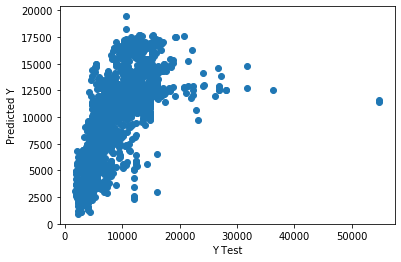

In [59]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [60]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2549.7754336214007
MSE: 12762533.333373334
RMSE: 3572.468800895724


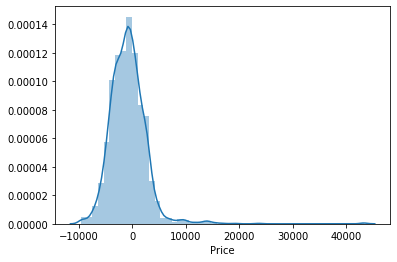

In [61]:
sns.distplot((y_test-predictions),bins=50);

## Apply lasso Regression

In [62]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error , r2_score

In [63]:
ls=Lasso()
ls.fit(encoding_x_train,y_train)
ls.score(encoding_x_train,y_train)


0.5978022052875487

In [64]:
pred_model_lasso=ls.predict(encoding_x_test)
print(np.sqrt(mean_squared_error(y_test,pred_model_lasso)))
print(r2_score(y_test, pred_model_lasso))

3567.591335051267
0.40817656099125976


## Apply Ridge Regression

In [65]:
from sklearn.linear_model import Ridge

In [66]:
ri=Ridge()
ri.fit(encoding_x_train,y_train)
ri.score(encoding_x_train,y_train)


0.5978461322770281

In [67]:
pred_model_lasso=ri.predict(encoding_x_test)
print(np.sqrt(mean_squared_error(y_test,pred_model_lasso)))
print(r2_score(y_test, pred_model_lasso))

3571.29809064314
0.4069461036350617


## apply knn

In [68]:
from sklearn.neighbors import KNeighborsClassifier


In [74]:
test_accuracy_list=[ ]


for i in range(1, 10):


    knn= KNeighborsClassifier(n_neighbors=i)
    knn.fit(encoding_x_train, y_train)
    
    
    y_pred_test=knn.predict(encoding_x_test)
    test_accuracy_list.append(accuracy_score(y_test, y_pred_test))
    
    
        

In [75]:
print(accuracy_score(y_pred_test, y_test))

0.20468675274988044
